In [243]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("magma")

params = {
    'legend.fontsize': '15',
    'figure.figsize': (15, 8),
     'axes.labelsize': '20',
     'axes.titlesize':'30',
     'xtick.labelsize':'18',
     'ytick.labelsize':'18',
}
plt.rcParams.update(params)

In [244]:
import warnings
warnings.filterwarnings("ignore")

In [245]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks

In [246]:
df = pd.read_csv("books.csv", error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [247]:
df = pd.read_csv("../../data/acs2015_census_tract_data/acs2015_census_tract_data.csv")

In [248]:
df

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,61838.0,11900.0,25713.0,4548.0,8.1,8.4,34.7,17.0,21.3,11.9,15.2,90.2,4.8,0.0,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,32303.0,13538.0,18021.0,2474.0,25.5,40.3,22.3,24.7,21.5,9.4,22.0,86.3,13.1,0.0,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,44922.0,5629.0,20689.0,2817.0,12.7,19.7,31.4,24.9,22.1,9.2,12.4,94.8,2.8,0.0,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,54329.0,7003.0,24125.0,2870.0,2.1,1.6,27.0,20.8,27.0,8.7,16.4,86.6,9.1,0.0,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,51965.0,6935.0,27526.0,2813.0,11.4,17.5,49.6,14.2,18.2,2.1,15.8,88.0,10.5,0.0,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco,6205,3291,2914,99.7,0.3,0.0,0.0,0.0,0.0,4354,21188.0,3599.0,8474.0,1489.0,40.7,59.9,32.9,19.2,26.8,11.1,10.1,81.0,10.2,2.3,0.9,3.3,2.3,22.5,1659,64.7,31.3,3.9,0.0,21.3
73997,72153750502,Puerto Rico,Yauco,2122,921,1201,99.2,0.3,0.0,0.0,0.5,0.0,1466,25781.0,7874.0,10788.0,2216.0,32.8,28.0,36.6,13.0,20.9,20.5,9.1,92.4,3.9,3.7,0.0,0.0,0.0,23.5,484,64.0,32.6,3.3,0.0,22.4
73998,72153750503,Puerto Rico,Yauco,2277,1097,1180,99.5,0.4,0.0,0.0,0.2,0.0,1741,17284.0,3507.0,8524.0,1840.0,56.6,83.5,21.0,32.6,29.7,3.1,13.6,84.3,9.5,0.0,3.2,0.0,3.0,29.8,582,58.2,32.3,9.5,0.0,23.3
73999,72153750601,Puerto Rico,Yauco,5267,2663,2604,98.8,1.2,0.0,0.0,0.0,0.0,3938,22083.0,9813.0,9907.0,1898.0,39.9,34.6,36.7,18.6,23.9,10.2,10.7,93.5,6.5,0.0,0.0,0.0,0.0,26.9,1369,67.5,31.2,1.3,0.0,26.7


In [249]:
df = df.dropna()

In [250]:
df1 = df[[
#    'IncomePerCapErr' 'IncomeErr', 'MeanCommute', 'TotalPop', 
    'Men', 'Women',
    'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
    'Income', 'IncomePerCap','Poverty',
    'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
    'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
    'WorkAtHome',  'Employed', 'PrivateWork', 'PublicWork',
    'SelfEmployed', 'FamilyWork', 'Unemployment'
]]

In [251]:
rating = df1["Citizen"]
df1["Citizen"].max(),sorted(list(df1["Citizen"].unique()))[:12]

(37416, [34, 41, 53, 58, 63, 66, 68, 71, 72, 91, 93, 102])

In [252]:
len(df1)

72727

In [253]:
rr = rating[rating.between(rating.quantile(.02), rating.quantile(.98))]
rr.min(), rr.max(), len(rr)/len(df1)

(919, 6513, 0.9600423501588131)

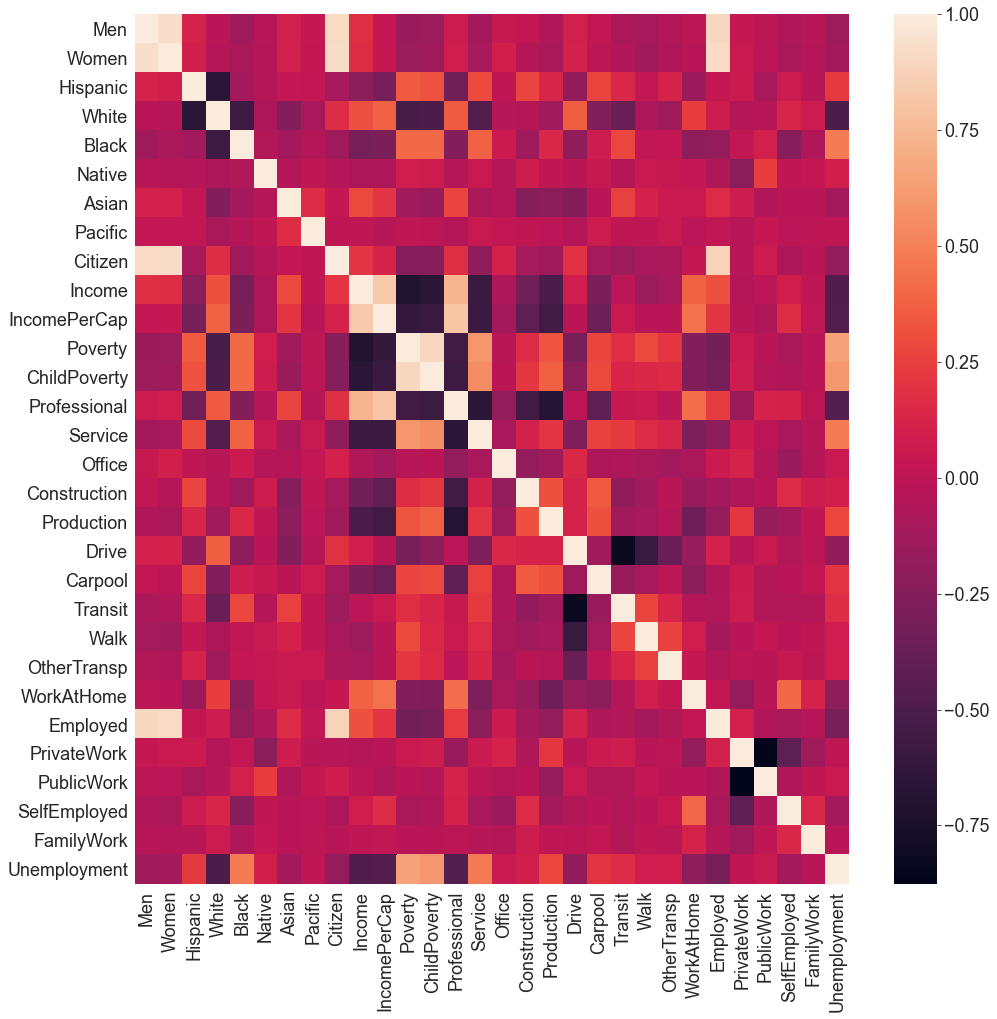

In [254]:
plt.figure(figsize=(16,16))
sns.heatmap(df1.corr(), annot=False)
plt.show()

In [255]:
df2 = df1.copy()

In [256]:
def manorwoman(val):
    x = val[0]
    y = val[1]
    if x > y:
        return [1,0]
    else:
        return [0,1]

In [257]:
dats = df1[['Men', 'Women']].apply(lambda x: manorwoman(x), axis=1).values
df2['Men'] = [x[0] for x in dats]
df2['Women'] = [x[1] for x in dats]

In [258]:
def ethnic(vals):
    res = []
    newvals= np.array(vals)[np.argsort(vals)]
    for i, v in enumerate(vals):
        for j, nv in enumerate(newvals):
            if v == nv:
                res.append(j)
                break
    return res

In [259]:
df3 = df2
# dats = df2[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].apply(lambda x: ethnic(x), axis=1).values
# df3['Hispanic']= [x[0] for x in dats]
# df3['White'] =   [x[1] for x in dats]
# df3['Black'] =   [x[2] for x in dats]
# df3['Native'] =  [x[3] for x in dats]
# df3['Asian'] =   [x[4] for x in dats]
# df3['Pacific'] = [x[5] for x in dats]

In [260]:
def citi(val):
    import math
    
    if val < 1000:
        return 0
    elif val > 1000 and val < 8000:
        #return round(val, -3)
        return val// 10 ** (int(math.log(val, 10)))
    else:
        return 9

In [261]:
df4 = df3
# df4['Citizen'] = df3['Citizen'].apply(lambda x: citi(x))

In [262]:
df5 = df4
df5["Income"] = pd.cut(df4["Income"], bins=20, labels=False)
df5["Citizen"] = pd.cut(df4["Citizen"], bins=20, labels=False)
df5["IncomePerCap"] = pd.cut(df4["IncomePerCap"], bins=18, labels=False)
df5["Poverty"] = pd.cut(df4["Poverty"], bins=10, labels=False)
df5["ChildPoverty"] = pd.cut(df4["ChildPoverty"], bins=20, labels=False)
df5["Employed"] = pd.cut(df4["Employed"], bins=20, labels=False)
df5["Unemployment"] = pd.cut(df4["Unemployment"], bins=20, labels=False)

df5[['Hispanic', 'White', 'Black', 'Native', 'Asian',
     'Pacific']] = df2[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].apply(pd.cut, bins=5, labels=False)

df5[["Professional","Service","Office","Construction",
     "Production"]] = df4[["Professional","Service","Office","Construction","Production"]].apply(pd.cut, bins=5, labels=False)
df5[["Drive", "Carpool","Transit","Walk","OtherTransp",
     "WorkAtHome"]] = df4[["Drive", "Carpool","Transit","Walk","OtherTransp","WorkAtHome"]].apply(pd.cut, bins=6, labels=False)
df5[["PrivateWork","PublicWork","SelfEmployed",
     "FamilyWork"]] = df4[["PrivateWork","PublicWork","SelfEmployed","FamilyWork"]].apply(pd.cut, bins=5, labels=False)

In [263]:
pd.cut(df5["Citizen"], bins=10, labels=False).value_counts()

0    53305
1    18777
2      554
3       69
4       12
5        5
7        2
6        2
9        1
Name: Citizen, dtype: int64

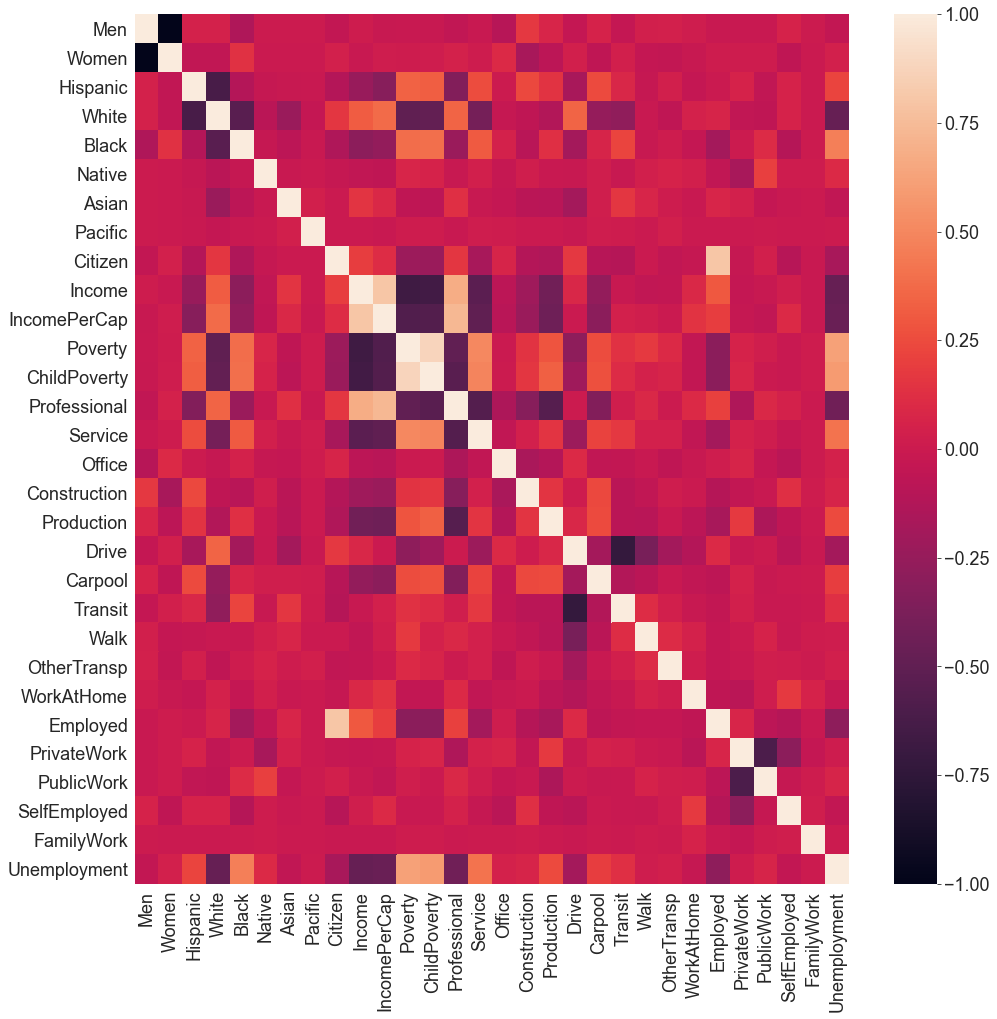

In [264]:
plt.figure(figsize=(16,16))
sns.heatmap(df5.corr(), annot=False)
plt.show()

<AxesSubplot:>

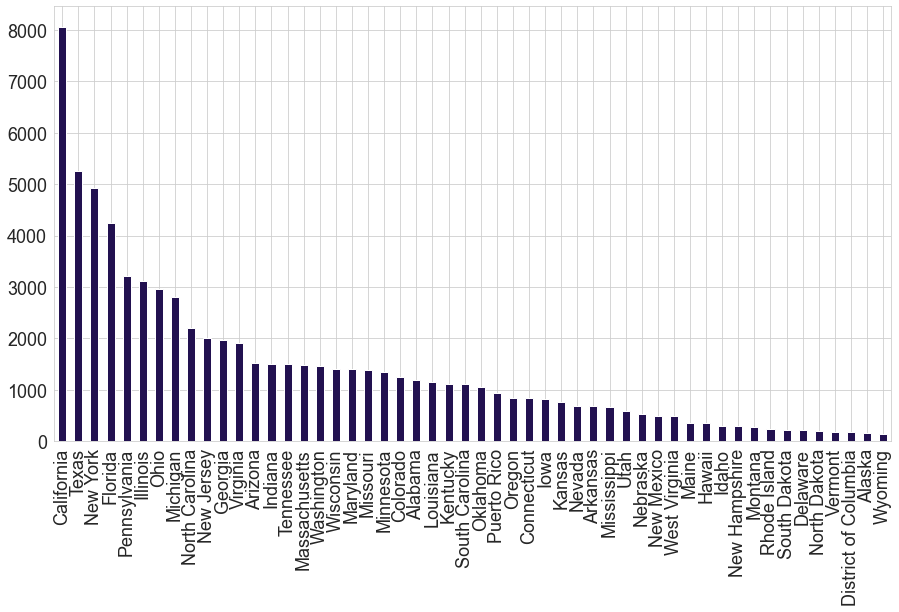

In [34]:
df["State"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

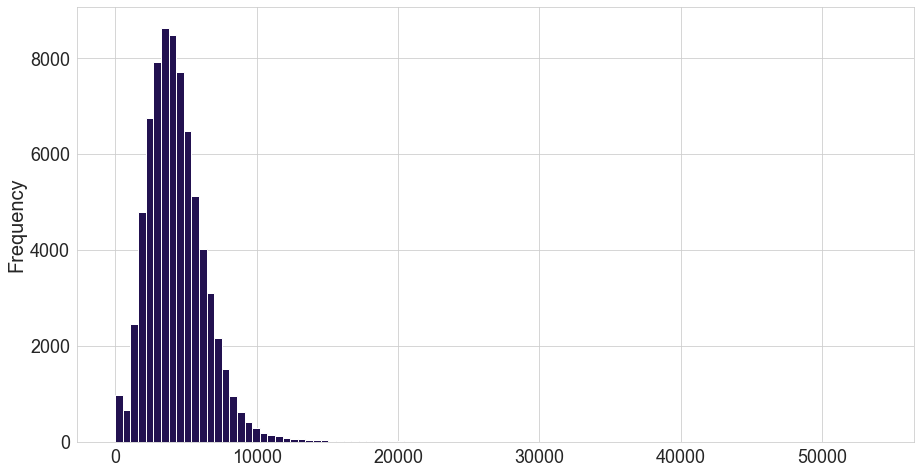

In [48]:
df["TotalPop"].plot(kind="hist", bins=100)

<AxesSubplot:ylabel='Frequency'>

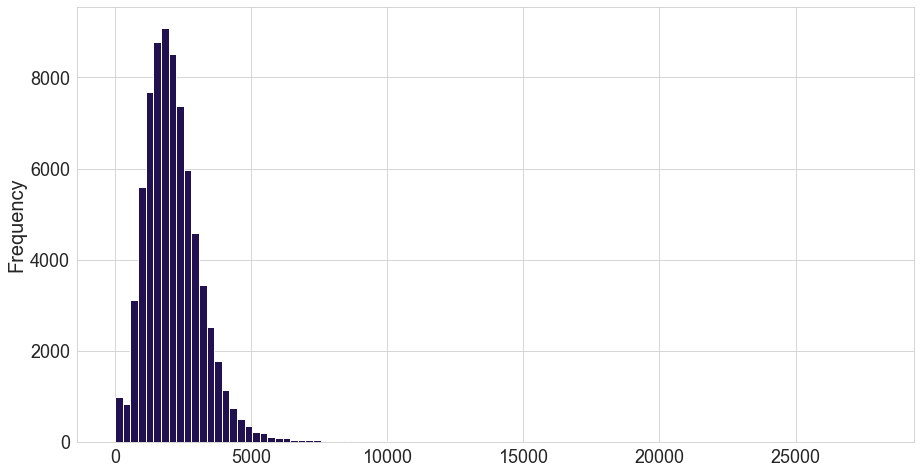

In [50]:
df["Men"].plot(kind="hist", bins=100)

<AxesSubplot:ylabel='Frequency'>

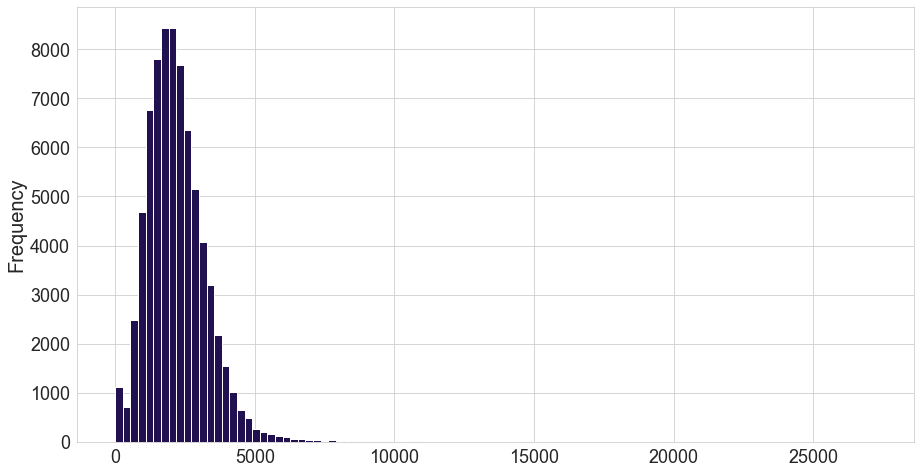

In [51]:
df["Women"].plot(kind="hist", bins=100)

<AxesSubplot:ylabel='Frequency'>

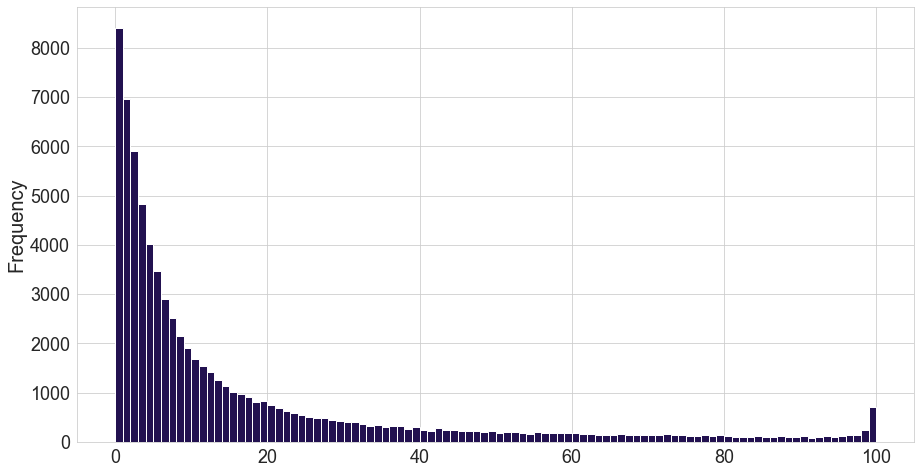

In [54]:
df["Hispanic"].plot(kind="hist", bins=100)

# Clustering

In [278]:
from sklearn import metrics
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN

In [279]:
X = df5.values
random_state = 10

In [283]:
yy = KMeans(n_clusters=10, random_state=random_state).fit_predict(X)
y_pred = KMeans(n_clusters=10, random_state=random_state).fit(X)
labels = y_pred.labels_

In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))
print("Calinski Harabasz Score: %0.3f"
      % metrics.calinski_harabasz_score(X, labels))
print("Davies Bouldin Score: %0.3f"
      % metrics.davies_bouldin_score(X, labels))

In [144]:
df5.head(15)

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,1,0,4,0,0,0,0,0,4,1,0,1,1,1,1,0,1,5,0,0,0,0,0,0,3,1,0,0,1
1,0,1,0,2,2,0,0,0,0,2,1,2,8,1,1,1,0,1,5,1,0,0,0,0,0,3,0,0,0,3
2,0,1,0,3,0,0,0,0,1,3,1,1,3,1,1,1,0,1,5,0,0,0,0,0,1,2,1,1,0,1
3,0,1,0,4,0,0,0,0,1,4,1,0,0,1,1,1,0,1,5,0,0,0,0,0,1,3,1,0,0,3
4,0,1,0,3,1,0,0,0,4,4,1,1,3,2,0,1,0,1,5,1,0,0,0,0,4,3,1,0,0,1
5,0,1,0,3,0,0,0,0,1,4,2,1,4,1,1,2,0,1,4,0,0,0,0,0,1,3,0,0,0,3
6,0,1,0,3,0,0,0,0,1,2,1,2,8,0,1,1,0,1,5,0,0,0,0,0,0,3,0,0,0,3
7,0,1,0,4,0,0,0,0,1,5,2,1,5,2,0,2,0,0,5,0,0,0,0,0,1,3,0,0,0,2
8,1,0,0,4,0,0,0,0,4,4,1,1,3,1,1,1,0,1,5,0,0,0,0,0,3,3,1,0,0,2
9,1,0,0,4,0,0,0,0,2,3,1,0,1,1,0,1,0,2,5,0,0,0,0,0,2,3,0,0,0,2


# Apriori Changes

In [276]:
df6 = df5.copy()

In [277]:
df6

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,1,0,4,0,0,0,0,0,4,1,0,1,1,1,1,0,1,5,0,0,0,0,0,0,3,1,0,0,1
1,0,1,0,2,2,0,0,0,0,2,1,2,8,1,1,1,0,1,5,1,0,0,0,0,0,3,0,0,0,3
2,0,1,0,3,0,0,0,0,1,3,1,1,3,1,1,1,0,1,5,0,0,0,0,0,1,2,1,1,0,1
3,0,1,0,4,0,0,0,0,1,4,1,0,0,1,1,1,0,1,5,0,0,0,0,0,1,3,1,0,0,3
4,0,1,0,3,1,0,0,0,4,4,1,1,3,2,0,1,0,1,5,1,0,0,0,0,4,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,1,0,4,0,0,0,0,0,2,1,0,4,11,1,1,1,0,0,4,1,0,0,0,0,1,2,1,0,0,6
73997,0,1,4,0,0,0,0,0,0,1,0,3,5,1,0,1,1,0,5,0,0,0,0,0,0,2,1,0,0,6
73998,0,1,4,0,0,0,0,0,0,1,0,5,16,1,2,1,0,1,5,1,0,0,0,0,0,2,1,0,0,6
73999,1,0,4,0,0,0,0,0,2,1,0,4,6,1,1,1,0,0,5,0,0,0,0,0,1,3,1,0,0,7


In [283]:
df6[['Poverty_1','Poverty_2','Poverty_3','Poverty_4','Poverty_6','Poverty_7']].head(15)

,Poverty_1,Poverty_2,Poverty_3,Poverty_4,Poverty_6,Poverty_7
0,False,False,False,False,False,False
1,False,True,False,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,False,False
4,True,False,False,False,False,False
5,True,False,False,False,False,False
6,False,True,False,False,False,False
7,True,False,False,False,False,False
8,True,False,False,False,False,False
9,False,False,False,False,False,False


In [274]:
# df6[["Men", "Women"]] = df6[["Men", "Women"]].astype('bool')

In [278]:
df6 = pd.get_dummies(data=df6, columns=['Income', 'Citizen', 'IncomePerCap', 'Poverty', 'ChildPoverty', 'Employed', 'Unemployment'])

In [279]:
# dfset = df6[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]
# df6[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']] = dfset.eq(dfset.max(1), axis=0)  

In [280]:
dfset1 = df6[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]
df6[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']] = dfset1.eq(dfset1.max(1), axis=0)

dfset2 = df6[["Professional","Service","Office","Construction","Production"]]
df6[["Professional","Service","Office","Construction","Production"]] = dfset2.eq(dfset2.max(1), axis=0)

dfset3 = df6[["Drive", "Carpool","Transit","Walk","OtherTransp","WorkAtHome"]]
df6[["Drive", "Carpool","Transit","Walk","OtherTransp","WorkAtHome"]] = dfset3.eq(dfset3.max(1), axis=0)

dfset4 = df6[["PrivateWork","PublicWork","SelfEmployed","FamilyWork"]]
df6[["PrivateWork","PublicWork","SelfEmployed","FamilyWork"]] = dfset4.eq(dfset4.max(1), axis=0)

In [281]:
len(df6.columns)

141

In [282]:
df6 = df6.astype('bool')

# Apriori

In [107]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [108]:
records = df6.values.tolist()

In [264]:
dfa = pd.DataFrame(te_ary)

In [146]:
apriori(df6, min_support=0.51, use_colnames=True)

,support,itemsets
0,0.623441,(Women)
1,0.771529,(White)
2,0.674110,(Professional)
3,0.524372,(Office)
4,0.962971,(Drive)
5,0.994651,(PrivateWork)
6,0.530779,(Citizen_1)
7,0.600451,"(Women, Drive)"
8,0.621557,"(Women, PrivateWork)"
9,0.593810,"(White, Professional)"


In [171]:
df6

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Income_0,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Income_9,Income_10,Income_11,Income_12,Income_13,Income_14,Income_15,Income_16,Income_17,Income_18,Income_19,Citizen_0,Citizen_1,Citizen_2,Citizen_3,Citizen_4,Citizen_5,Citizen_6,Citizen_7,Citizen_8,Citizen_9,Citizen_10,Citizen_11,Citizen_12,Citizen_13,Citizen_15,Citizen_19,IncomePerCap_0,IncomePerCap_1,IncomePerCap_2,IncomePerCap_3,IncomePerCap_4,IncomePerCap_5,IncomePerCap_6,IncomePerCap_7,IncomePerCap_8,IncomePerCap_9,IncomePerCap_10,IncomePerCap_11,IncomePerCap_12,IncomePerCap_13,IncomePerCap_14,IncomePerCap_17,Poverty_0,Poverty_1,Poverty_2,Poverty_3,Poverty_4,Poverty_5,Poverty_6,Poverty_7,Poverty_8,Poverty_9,ChildPoverty_0,ChildPoverty_1,ChildPoverty_2,ChildPoverty_3,ChildPoverty_4,ChildPoverty_5,ChildPoverty_6,ChildPoverty_7,ChildPoverty_8,ChildPoverty_9,ChildPoverty_10,ChildPoverty_11,ChildPoverty_12,ChildPoverty_13,ChildPoverty_14,ChildPoverty_15,ChildPoverty_16,ChildPoverty_17,ChildPoverty_18,ChildPoverty_19,Employed_0,Employed_1,Employed_2,Employed_3,Employed_4,Employed_5,Employed_6,Employed_7,Employed_8,Employed_9,Employed_10,Employed_11,Employed_12,Employed_13,Employed_15,Employed_19,Unemployment_0,Unemployment_1,Unemployment_2,Unemployment_3,Unemployment_4,Unemployment_5,Unemployment_6,Unemployment_7,Unemployment_8,Unemployment_9,Unemployment_10,Unemployment_11,Unemployment_12,Unemployment_13,Unemployment_14,Unemployment_15,Unemployment_16,Unemployment_17,Unemployment_18,Unemployment_19
0,False,True,False,True,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,True,True,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,True,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True

# Other Apriori

In [148]:
from apyori import apriori

In [163]:
association_rules = apriori(df6, min_support=0.26, min_confidence=0.2, min_lift=3, min_length=2)

association_rules = list(association_rules)

In [164]:
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    print(pair)
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

frozenset({'m', 'l', 'p', 'y'})
Rule: m -> l
Support: 0.2624113475177305
Confidence: 0.9736842105263157
Lift: 3.7105263157894735
frozenset({'l', 'm', 'y', 'p', 'e'})
Rule: l -> m
Support: 0.2624113475177305
Confidence: 0.9736842105263157
Lift: 3.7105263157894735
frozenset({'l', 'm', 'y', 'p', 'o'})
Rule: l -> m
Support: 0.2624113475177305
Confidence: 0.9736842105263157
Lift: 3.7105263157894735
frozenset({'l', 'm', 'y', 'p', 'o', 'e'})
Rule: l -> m
Support: 0.2624113475177305
Confidence: 0.9736842105263157
Lift: 3.7105263157894735


In [161]:
association_rule

[RelationRecord(items=frozenset({'m', 'l', 'p', 'y'}), support=0.2624113475177305, ordered_statistics=[OrderedStatistic(items_base=frozenset({'m', 'l'}), items_add=frozenset({'y', 'p'}), confidence=0.9736842105263157, lift=3.7105263157894735), OrderedStatistic(items_base=frozenset({'l', 'p'}), items_add=frozenset({'m', 'y'}), confidence=0.9736842105263157, lift=3.6128808864265927), OrderedStatistic(items_base=frozenset({'m', 'y'}), items_add=frozenset({'l', 'p'}), confidence=0.9736842105263157, lift=3.6128808864265927), OrderedStatistic(items_base=frozenset({'y', 'p'}), items_add=frozenset({'m', 'l'}), confidence=1.0, lift=3.710526315789474)]),
 RelationRecord(items=frozenset({'l', 'm', 'y', 'p', 'e'}), support=0.2624113475177305, ordered_statistics=[OrderedStatistic(items_base=frozenset({'m', 'l'}), items_add=frozenset({'y', 'p', 'e'}), confidence=0.9736842105263157, lift=3.7105263157894735), OrderedStatistic(items_base=frozenset({'l', 'p'}), items_add=frozenset({'m', 'e', 'y'}), conf

In [284]:
df7 = df6.copy()
for col in df6.columns:
    df7[col].replace({True: col, False: np.nan}, inplace=True)
#     df7[col] = list(np.where((df6[col] == True), col, df6[col]))

In [286]:
df8 = df7.copy()
# df8.columns= range(len(df7.columns))

In [287]:
df8

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Income_0,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Income_9,Income_10,Income_11,Income_12,Income_13,Income_14,Income_15,Income_16,Income_17,Income_18,Income_19,Citizen_0,Citizen_1,Citizen_2,Citizen_3,Citizen_4,Citizen_5,Citizen_6,Citizen_7,Citizen_8,Citizen_9,Citizen_10,Citizen_11,Citizen_12,Citizen_13,Citizen_15,Citizen_19,IncomePerCap_0,IncomePerCap_1,IncomePerCap_2,IncomePerCap_3,IncomePerCap_4,IncomePerCap_5,IncomePerCap_6,IncomePerCap_7,IncomePerCap_8,IncomePerCap_9,IncomePerCap_10,IncomePerCap_11,IncomePerCap_12,IncomePerCap_13,IncomePerCap_14,IncomePerCap_17,Poverty_0,Poverty_1,Poverty_2,Poverty_3,Poverty_4,Poverty_5,Poverty_6,Poverty_7,Poverty_8,Poverty_9,ChildPoverty_0,ChildPoverty_1,ChildPoverty_2,ChildPoverty_3,ChildPoverty_4,ChildPoverty_5,ChildPoverty_6,ChildPoverty_7,ChildPoverty_8,ChildPoverty_9,ChildPoverty_10,ChildPoverty_11,ChildPoverty_12,ChildPoverty_13,ChildPoverty_14,ChildPoverty_15,ChildPoverty_16,ChildPoverty_17,ChildPoverty_18,ChildPoverty_19,Employed_0,Employed_1,Employed_2,Employed_3,Employed_4,Employed_5,Employed_6,Employed_7,Employed_8,Employed_9,Employed_10,Employed_11,Employed_12,Employed_13,Employed_15,Employed_19,Unemployment_0,Unemployment_1,Unemployment_2,Unemployment_3,Unemployment_4,Unemployment_5,Unemployment_6,Unemployment_7,Unemployment_8,Unemployment_9,Unemployment_10,Unemployment_11,Unemployment_12,Unemployment_13,Unemployment_14,Unemployment_15,Unemployment_16,Unemployment_17,Unemployment_18,Unemployment_19
0,NaN,Women,NaN,White,NaN,NaN,NaN,NaN,Professional,Service,Office,NaN,Production,Drive,NaN,NaN,NaN,NaN,NaN,PrivateWork,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Income_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Citizen_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IncomePerCap_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poverty_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChildPoverty_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unemployment_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Women,NaN,White,Black,NaN,NaN,NaN,Professional,Service,Office,NaN,Production,Drive,NaN,NaN,NaN,NaN,NaN,PrivateWork,NaN,NaN,NaN,NaN,NaN,Income_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Citizen_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IncomePerCap_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poverty_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChildPoverty_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unemployment_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Women,NaN,White,NaN,NaN,NaN,NaN,Professional,Service,Office,NaN,Production,Drive,NaN,NaN,NaN,NaN,NaN,PrivateWork,NaN,NaN,NaN,NaN,NaN,NaN,Income_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Citizen_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IncomePerCap_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poverty_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChildPoverty_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unemployment_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Women,NaN,White,NaN,NaN,NaN,NaN,Professional,Service,Office,NaN,Production,Drive,NaN,NaN,NaN,NaN,NaN,PrivateWork,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Income_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Citizen_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IncomePerCap_1,NaN,NaN

In [310]:
records = df8.values.tolist()
records = [[x for x in t if str(x) != 'nan'] for t in records]

In [311]:
records[127]

['Men',
 'White',
 'Office',
 'Drive',
 'PrivateWork',
 'Income_2',
 'Citizen_1',
 'IncomePerCap_1',
 'Poverty_1',
 'ChildPoverty_7',
 'Employed_1',
 'Unemployment_2']

In [320]:
association_rules = apriori(records, min_support=0.16, min_confidence=0.1, min_lift=2, min_length=2)

association_rules = list(association_rules)

In [321]:
print(association_rules[0])

RelationRecord(items=frozenset({'ChildPoverty_0', 'Poverty_0'}), support=0.17908067155251833, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ChildPoverty_0'}), items_add=frozenset({'Poverty_0'}), confidence=0.9151851591595813, lift=2.5205889218434776), OrderedStatistic(items_base=frozenset({'Poverty_0'}), items_add=frozenset({'ChildPoverty_0'}), confidence=0.49322123759751574, lift=2.5205889218434776)])


In [322]:
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    print(pair)
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

frozenset({'ChildPoverty_0', 'Poverty_0'})
Rule: ChildPoverty_0 -> Poverty_0
Support: 0.17908067155251833
Confidence: 0.9151851591595813
Lift: 2.5205889218434776
frozenset({'Employed_0', 'Citizen_0'})
Rule: Employed_0 -> Citizen_0
Support: 0.16099935374757654
Confidence: 0.7963680881452765
Lift: 3.5652485039422297
frozenset({'ChildPoverty_0', 'Poverty_0', 'Drive'})
Rule: ChildPoverty_0 -> Poverty_0
Support: 0.17490065587745954
Confidence: 0.8938233434052422
Lift: 2.5055924412516593
frozenset({'ChildPoverty_0', 'PrivateWork', 'Poverty_0'})
Rule: ChildPoverty_0 -> PrivateWork
Support: 0.17844816918063441
Confidence: 0.911952779144122
Lift: 2.521809496913101
frozenset({'ChildPoverty_0', 'Poverty_0', 'Professional'})
Rule: ChildPoverty_0 -> Poverty_0
Support: 0.16490436839138148
Confidence: 0.8427376853348325
Lift: 2.6174318261593084
frozenset({'ChildPoverty_0', 'White', 'Poverty_0'})
Rule: ChildPoverty_0 -> White
Support: 0.16990938716020185
Confidence: 0.8683156489354227
Lift: 2.55254616

In [324]:
association_rules[0]["frozenset"]

TypeError: tuple indices must be integers or slices, not str